# フィルタ処理の関数

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [55]:
def conv2d(a,b):
    """
    calculate convolution
    
    Args:
    a : array
    b : array
    
    Returns:
    result of convolution
    """
    return np.multiply(a,b).sum()

def filter_process(img,K):
    """
    calculate convolution of img using filter K
    
    Args:
    img : image array
    K : filter array
    """
    result = np.zeros_like(img)
    h_img,w_img = img.shape # get height and weight of img
    h_k,w_k = K.shape # get height and weight of K
    adj_size = h_k%2
    
    # main process
    for y in range(adj_size,h_img-adj_size):
        for x in range(adj_size,w_img-adj_size):
            # write here what to do
            extract_array = img[y-adj_size:y+adj_size+1,x-adj_size:x+adj_size+1]
            tmp = conv2d(extract_array,K)
            if tmp>255:
                result[y,x] = 255
            elif tmp<0:
                result[y,x] = 0
            else:
                result[y,x] = tmp
            
    return result

In [41]:
def gen_grayscale(img):
    green = img[:,:,0]
    blue = img[:,:,1]
    red = img[:,:,2]
    
    gray =  0.2126*red + 0.7152*green + 0.0722*blue
    
    gray = gray.astype(np.uint8)
    return gray

(128, 128)


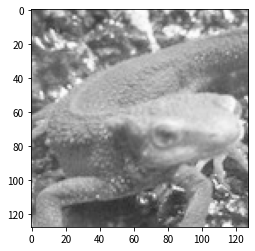

In [42]:
img = cv2.imread("imori.jpg")
img = gen_grayscale(img)
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [56]:
B = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
result = filter_process(img,B)

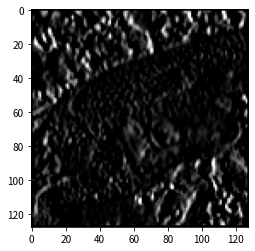

In [57]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()